# Task 1: Preprocess and Explore the Data

## Objective
Load, clean, and understand the data to prepare it for modeling.
Focus on extracting financial data, cleaning it, and performing exploratory analysis.

In [1]:
import yfinance as yf

# Test an individual ticker
ticker = 'TSLA'
data = yf.download(ticker, start='2015-01-01', end='2026-01-15')
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           TSLA       TSLA       TSLA       TSLA      TSLA
Date                                                            
2015-01-02  14.620667  14.883333  14.217333  14.858000  71466000
2015-01-05  14.006000  14.433333  13.810667  14.303333  80527500
2015-01-06  14.085333  14.280000  13.614000  14.004000  93928500
2015-01-07  14.063333  14.318667  13.985333  14.223333  44526000
2015-01-08  14.041333  14.253333  14.000667  14.187333  51637500


In [2]:
%pip install yfinance

import sys
import os
# Add src to path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

print(os.listdir('c:\\Users\\ruths\\Desktop\\10AcademyWeek0\\Time-series-forecasting-for-portfolio-management-optimization\\src'))

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_loader import fetch_data, clean_data
from utils import check_stationarity, calculate_daily_returns, plot_price_series, calculate_risk_metrics

# %matplotlib inline


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
['data_loader.py', 'models.py', 'utils.py', '__init__.py', '__pycache__']


## 1. Data Extraction

In [3]:
TICKERS = ['TSLA', 'BND', 'SPY']
START_DATE = '2015-01-01'
END_DATE = '2026-01-15'

# Fetch the data
raw_data = fetch_data(TICKERS, START_DATE, END_DATE)

# Check if raw_data is None and handle accordingly
if raw_data is not None:
    print("Raw Data Shape:", raw_data.shape)
    print(raw_data.head())
else:
    print("Failed to fetch data. Please check the TICKERS and date range.")

2026-01-25 21:48:36,765 - INFO - Fetching data for ['TSLA', 'BND', 'SPY'] from 2015-01-01 to 2026-01-15...
[*********************100%***********************]  3 of 3 completed
2026-01-25 21:48:37,685 - INFO - Data fetched successfully.


Raw Data Shape: (2775, 15)
Ticker           TSLA                                                    SPY  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2015-01-02  14.858000  14.883333  14.217333  14.620667  71466000  171.378538   
2015-01-05  14.303333  14.433333  13.810667  14.006000  80527500  169.543288   
2015-01-06  14.004000  14.280000  13.614000  14.085333  93928500  167.816066   
2015-01-07  14.223333  14.318667  13.985333  14.063333  44526000  167.259676   
2015-01-08  14.187333  14.253333  14.000667  14.041333  51637500  169.410398   

Ticker                                                           BND  \
Price             High         Low       Close     Volume       Open   
Date                                                                   
2015-01-02  171.793740  169.551642  170.589645  121465900  60.225248   
2015-01-05  169.709366  167.201559  167.5088

## 2. Data Cleaning
Checking for missing values and handling them.

In [4]:
# Fetch the data
raw_data = fetch_data(TICKERS, START_DATE, END_DATE)

# Check if raw_data is None
if raw_data is not None:
    # Clean the data
    data = clean_data(raw_data)

    # We typically focus on 'Close' or 'Adj Close' prices for analysis
    if isinstance(data.columns, pd.MultiIndex):
        # Inspect columns and safely extract Close price
        print(data.columns)
        try:
            close_prices = data['Close']
        except KeyError:
            close_prices = data.xs('Close', level=1, axis=1) if 'Close' in data.columns.get_level_values(1) else data

    else:
        close_prices = data['Close']

    # Display the first few rows of close prices
    print(close_prices.head())
else:
    print("Failed to fetch data. Please check the TICKERS and date range.")

2026-01-25 21:48:43,225 - INFO - Fetching data for ['TSLA', 'BND', 'SPY'] from 2015-01-01 to 2026-01-15...
[*********************100%***********************]  3 of 3 completed
2026-01-25 21:48:43,465 - INFO - Data fetched successfully.


MultiIndex([( 'SPY',   'Open'),
            ( 'SPY',   'High'),
            ( 'SPY',    'Low'),
            ( 'SPY',  'Close'),
            ( 'SPY', 'Volume'),
            ( 'BND',   'Open'),
            ( 'BND',   'High'),
            ( 'BND',    'Low'),
            ( 'BND',  'Close'),
            ( 'BND', 'Volume'),
            ('TSLA',   'Open'),
            ('TSLA',   'High'),
            ('TSLA',    'Low'),
            ('TSLA',  'Close'),
            ('TSLA', 'Volume')],
           names=['Ticker', 'Price'])
Ticker             SPY        BND       TSLA
Date                                        
2015-01-02  170.589645  60.385986  14.620667
2015-01-05  167.508804  60.561306  14.006000
2015-01-06  165.931061  60.736671  14.085333
2015-01-07  167.998734  60.773197  14.063333
2015-01-08  170.979858  60.678204  14.041333


## 3. Exploratory Data Analysis (EDA)
### Visualizing Closing Prices

2026-01-25 21:48:50,199 - INFO - Fetching data for ['TSLA', 'BND', 'SPY'] from 2015-01-01 to 2026-01-15...
[*********************100%***********************]  3 of 3 completed
2026-01-25 21:48:50,480 - INFO - Data fetched successfully.


MultiIndex([( 'SPY',   'Open'),
            ( 'SPY',   'High'),
            ( 'SPY',    'Low'),
            ( 'SPY',  'Close'),
            ( 'SPY', 'Volume'),
            ('TSLA',   'Open'),
            ('TSLA',   'High'),
            ('TSLA',    'Low'),
            ('TSLA',  'Close'),
            ('TSLA', 'Volume'),
            ( 'BND',   'Open'),
            ( 'BND',   'High'),
            ( 'BND',    'Low'),
            ( 'BND',  'Close'),
            ( 'BND', 'Volume')],
           names=['Ticker', 'Price'])


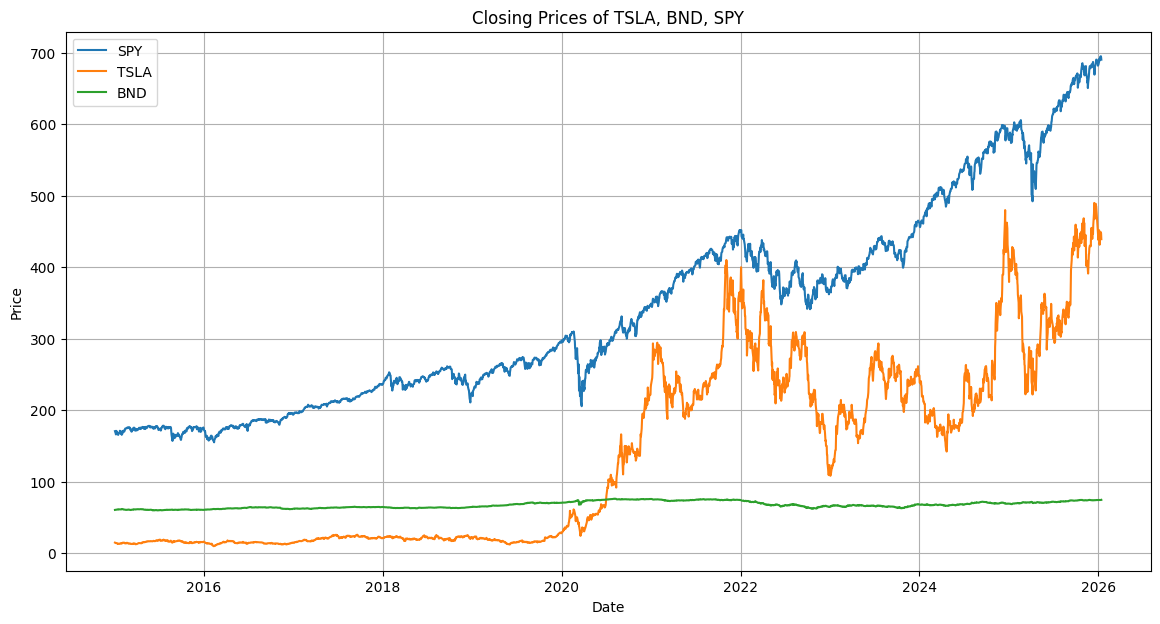

In [5]:
# Fetch the data
raw_data = fetch_data(TICKERS, START_DATE, END_DATE)

if raw_data is not None:
    data = clean_data(raw_data)

    if isinstance(data.columns, pd.MultiIndex):
        print(data.columns)
        try:
            close_prices = data['Close']
        except KeyError:
            close_prices = data.xs('Close', level=1, axis=1) if 'Close' in data.columns.get_level_values(1) else data
    else:
        close_prices = data['Close']

    # Now call the plotting function
    plot_price_series(close_prices, title="Closing Prices of TSLA, BND, SPY")
else:
    print("Failed to fetch data. Please check the TICKERS and date range.")

### Daily Returns and Volatility

2026-01-25 21:48:57,497 - INFO - Fetching data for ['TSLA', 'BND', 'SPY'] from 2015-01-01 to 2026-01-15...
[*********************100%***********************]  3 of 3 completed
2026-01-25 21:48:57,797 - INFO - Data fetched successfully.


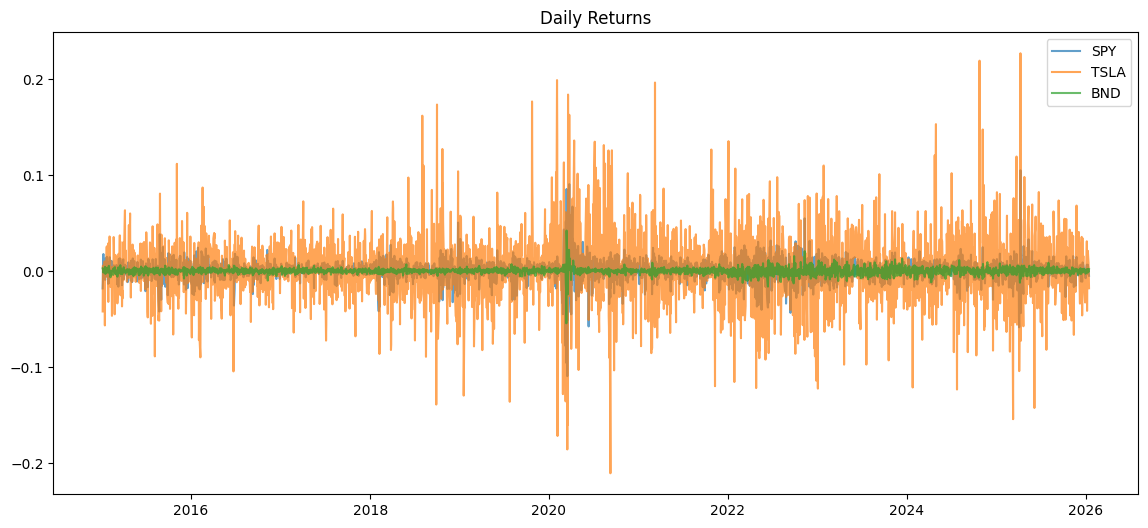

In [6]:
# Fetch the data
raw_data = fetch_data(TICKERS, START_DATE, END_DATE)

if raw_data is not None:
    data = clean_data(raw_data)
    
    if isinstance(data.columns, pd.MultiIndex):
        try:
            close_prices = data['Close']
        except KeyError:
            close_prices = data.xs('Close', level=1, axis=1) if 'Close' in data.columns.get_level_values(1) else None
    else:
        close_prices = data['Close']

    if close_prices is not None:
        # Calculate daily returns
        daily_returns = calculate_daily_returns(close_prices)

        # Plot
        plt.figure(figsize=(14, 6))
        for col in daily_returns.columns:
            plt.plot(daily_returns.index, daily_returns[col], label=col, alpha=0.7)
        plt.title("Daily Returns")
        plt.legend()
        plt.show()
    else:
        print("No close_prices data extracted.")
else:
    print("Failed to fetch data. Please check the TICKERS and date range.")

2026-01-25 21:49:03,739 - INFO - Fetching data for ['TSLA', 'BND', 'SPY'] from 2015-01-01 to 2026-01-15...
[*********************100%***********************]  3 of 3 completed
2026-01-25 21:49:03,955 - INFO - Data fetched successfully.


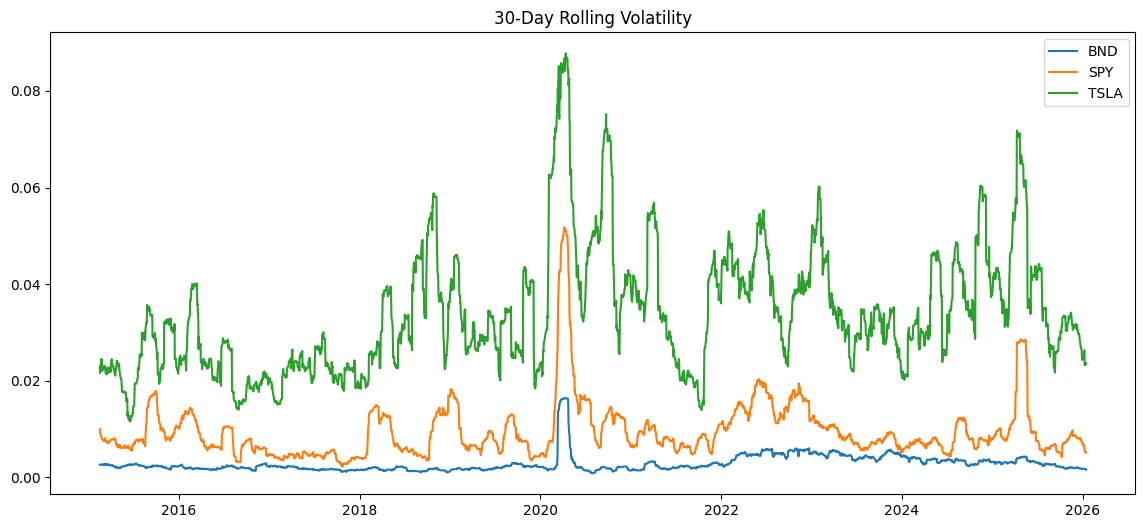

In [7]:
# Fetch the data
raw_data = fetch_data(TICKERS, START_DATE, END_DATE)

if raw_data is not None:
    data = clean_data(raw_data)

    if isinstance(data.columns, pd.MultiIndex):
        try:
            close_prices = data['Close']
        except KeyError:
            close_prices = data.xs('Close', level=1, axis=1) if 'Close' in data.columns.get_level_values(1) else None
    else:
        close_prices = data['Close']

    if close_prices is not None:
        # Calculate daily returns
        daily_returns = calculate_daily_returns(close_prices)

        # Ensure daily_returns is not None before proceeding
        if daily_returns is not None:
            # Rolling Volatility (30-day window)
            rolling_volatility = daily_returns.rolling(window=30).std()

            plt.figure(figsize=(14, 6))
            for col in rolling_volatility.columns:
                plt.plot(rolling_volatility.index, rolling_volatility[col], label=col)
            plt.title("30-Day Rolling Volatility")
            plt.legend()
            plt.show()
        else:
            print("Daily returns calculation failed.")
    else:
        print("No close_prices data extracted.")
else:
    print("Failed to fetch data. Please check the TICKERS and date range.")

## 4. Stationarity Analysis
Testing for stationarity using ADF test.

In [8]:
print("Stationarity Test on Returns:")
for col in daily_returns.columns:
    check_stationarity(daily_returns[col], name=f"{col} Returns")

print("\nStationarity Test on Prices (Log Prices often used, or raw):")
for col in close_prices.columns:
    check_stationarity(close_prices[col], name=f"{col} Prices")

Stationarity Test on Returns:
ADF Test for BND Returns:
  ADF Statistic: -10.433762
  p-value: 0.000000
  Critical Values:
    1%: -3.432730
    5%: -2.862592
    10%: -2.567330
Result: BND Returns is STATIONARY (p < 0.05)
------------------------------
ADF Test for SPY Returns:
  ADF Statistic: -17.228848
  p-value: 0.000000
  Critical Values:
    1%: -3.432717
    5%: -2.862586
    10%: -2.567327
Result: SPY Returns is STATIONARY (p < 0.05)
------------------------------
ADF Test for TSLA Returns:
  ADF Statistic: -53.019619
  p-value: 0.000000
  Critical Values:
    1%: -3.432710
    5%: -2.862583
    10%: -2.567325
Result: TSLA Returns is STATIONARY (p < 0.05)
------------------------------

Stationarity Test on Prices (Log Prices often used, or raw):
ADF Test for BND Prices:
  ADF Statistic: -1.051376
  p-value: 0.734068
  Critical Values:
    1%: -3.432721
    5%: -2.862587
    10%: -2.567328
Result: BND Prices is NON-STATIONARY (p >= 0.05)
------------------------------
ADF Test

## 5. Risk Metrics

In [9]:
risk_metrics = calculate_risk_metrics(daily_returns)
print("Risk Metrics:")
risk_metrics

Risk Metrics:


,VaR_95,Sharpe_Ratio,Mean_Daily_Return,Daily_Volatility
BND,-0.004797,0.381458,0.000081,0.003374
SPY,-0.016719,0.803991,0.000567,0.011193
TSLA,-0.052529,0.823185,0.001885,0.036343


### Conclusion
- **TSLA**: High volatility, high risk, potential for high returns.
- **BND**: Low volatility, stable, lower returns.
- **SPY**: Moderate volatility, diversified market exposure.

Returns are stationary, while prices are non-stationary.